HANDWRITTEN DIGITS CLUSTERING


Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml

Loading the Dataset

In [3]:
mnist =  fetch_openml('mnist_784',version=1,as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X,y = mnist.data,mnist.target.astype(int)
x = X / 255.0 #Flattening all  28x28 pixels images to a 784-dimensional vector
print("Shape of Dataset is:",X.shape)

Shape of Dataset is: (70000, 784)


Applying Kmeans Clustering

In [20]:
#Defining our model
kmeans = KMeans(n_clusters=10,random_state=10,n_init=10)
kmeans.fit(X)

#Getting cluster labels
clusters = kmeans.labels_

Visualizing cluster centers

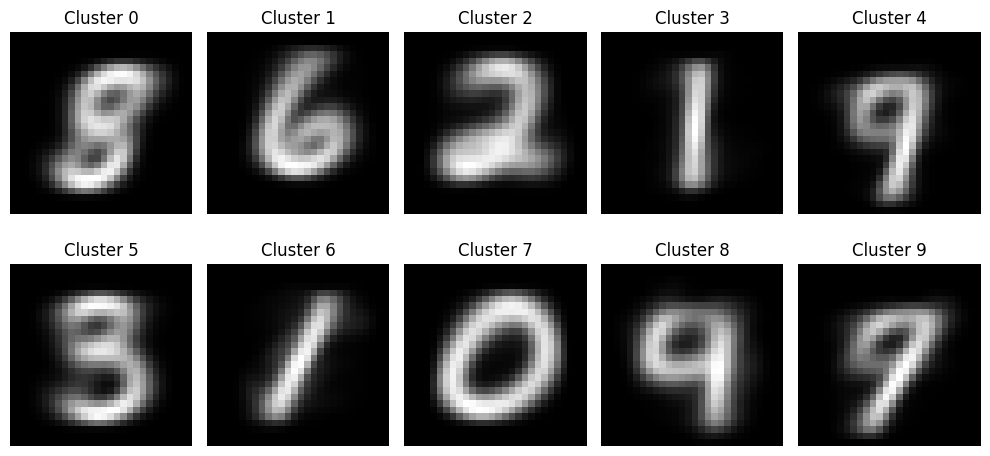

In [21]:
fig, axes = plt.subplots(2,5,figsize=(10,5))
for i , ax in enumerate(axes.flat):
  ax.imshow(kmeans.cluster_centers_[i].reshape(28,28),cmap='gray')
  ax.set_title(f'Cluster {i}')
  ax.axis('off')
plt.tight_layout()
plt.show()

Evaluating the Clustering Performance

In [22]:
from sklearn.metrics import homogeneity_score

# Homogeneity Score: Measures if each cluster contains only a single class
score = homogeneity_score(y, clusters)
print(f"Homogeneity Score: {score:.2f}")


Homogeneity Score: 0.48


Visualizing Some Samples Clusters

Samples from Cluster 0


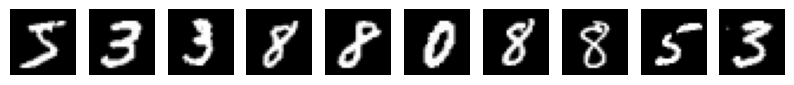

Samples from Cluster 1


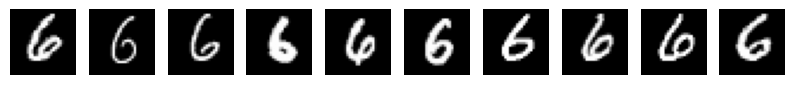

Samples from Cluster 2


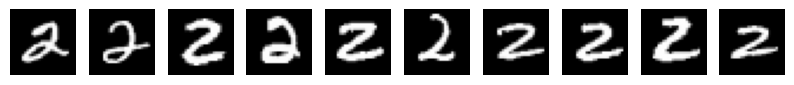

In [23]:
def plot_cluster_samples(X, clusters, cluster_id, num_samples=10):
    samples = X[clusters == cluster_id][:num_samples]
    fig, axes = plt.subplots(1, num_samples, figsize=(10, 2))
    for i, ax in enumerate(axes.flat):
        ax.imshow(samples[i].reshape(28, 28), cmap='gray')
        ax.axis("off")
    plt.show()

# Show samples from a few clusters
for i in range(3):
    print(f"Samples from Cluster {i}")
    plot_cluster_samples(X, clusters, i)
